# Приоритизация гипотез и проверка А/В-теста 

Отдел маркетинга подготовил список гипотез для увеличения выручки крупного интернет-магазина.
Целью работы является приоритизация гипотез и запуск A/B-теста с анализом его результатов.

## 1. Загрузка данных и подготовка их к дальнейшему анализу

In [1]:
#импорт библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [2]:
hypothesis= pd.read_csv('hypothesis.csv')#создаем переменную с данными из файла
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
orders=pd.read_csv('orders.csv')#создаем переменную с данными из файла
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [4]:
visitors=pd.read_csv('visitors.csv')#создаем переменную с данными из файла
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [5]:
hypothesis.info() #вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
orders.info()#вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.info()#вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Судя по изученным данным пропусков в таблицах нет, но нужно будет изменить названия столбцов на змеинный регистр в таблице hypothesis и orders. А так же следует изменить тип данных в столбцах date на дату. 

In [8]:
hypothesis.columns=['hypothesis','reach','impact','confidence','efforts'] #замена названий в таблице 

In [9]:
orders=orders.rename(columns={'transactionId':'transaction_id','visitorId':'visitor_id'})#замена названий в таблице 

In [10]:
#изменение типа данных в столбцах с датой
orders['date']=pd.to_datetime(orders['date'],format='%Y-%m-%d')
visitors['date']=pd.to_datetime(visitors['date'],format='%Y-%m-%d')

In [11]:
hypothesis.info()#вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [12]:
orders.info()#вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [13]:
visitors.info()#вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


В таблице hypothesis дубликатов нет, в таблице visitors они есть, но это нормально, так как даты повторяются в разных группах.
Теперь проверим на наличие дубликатов таблицу orders.

In [14]:
#провперка на наличие дубликатов
print('Количество дубликатов:',orders.duplicated().sum())
for i in orders.columns:
    if orders[i].duplicated().sum() > 0:
        print(i, orders[i].duplicated().sum())
    else:
        'good'

Количество дубликатов: 0
visitor_id 166
date 1166
revenue 484
group 1195


Дубликаты есть, но они логичны, так как пользователи могут совершать несколько покупок в разные дни. Все остальные дубликаты так же логичны. Поэтому можно сказать, что во всех таблицах нет дубликатов, которые исказят дальнейший анализ данных.

Данные теперь готовы к дальнейшему анализу.

## 2. Приоритизация гипотез

### 2.1 Применение фреймворка ICE для приоритизации гипотез.

In [15]:
#применение фреймворка ice
ice= (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
ice.sort_values(ascending=False)

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
dtype: float64

Наиболее перспективные гипотезы по ICE: 8,0,7,6

- 8-'Запустить акцию, дающую скидку на товар в день рождения'
- 0-'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 7-'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
- 6-'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'

In [16]:
#применение фреймворка rice
rice=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
rice.sort_values(ascending=False)

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64

По RICE перспективные гипотезы:7,2,0,6

- 7-'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
- 2-'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
- 0-'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 6-'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'

Приоритизация гипотез при применении двух разных шкал немного изменилась. Это связано с тем, что при применении RICE параметр reach у седьмой гипотезы равен 10, у второй 8, у нулевой 3 и у шестой 5. Восьмая не вошла в топ в этой шкале, так как reach равен 1. 

В итоге сначала лучше проверить гипотезы:
- 7-'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 0-'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 6-'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'.

## 3. Анализ A/B-теста

Для начала изучим количество людей в каждом тесте

In [17]:
# подсчет количества пользователей в группе А
orders_a=orders.query('group=="A"').reset_index(drop=True)
len(orders_a['visitor_id'].unique())

503

In [18]:
# подсчет количества пользователей в группе В
orders_b=orders.query('group=="B"').reset_index(drop=True)
len(orders_b['visitor_id'].unique())

586

Теперь посмотрим правильно ли разбили на группы пользователей

In [19]:
#цикл, сравнивающий значения visitor_id в двух группах и подсчитывающий количество одинаковых значений в них.
cnt=0
dupl=[]
for i in orders_a['visitor_id'].unique():
    for a in orders_b['visitor_id'].unique():
        if i == a:
            cnt+=1
            dupl.append(i)
cnt

58

Это значит что у нас есть 58 человек, которые попали в группу А и группу В. Это всего 5 % от всех людей, которые приняли участие в тесте, поэтому их можно удалить из обеих групп. 
Но для начала мы отредактируем таблицу visitors. Вычтем из ее данных информацию об этих пользователях.

In [20]:
 #создание таблицы с данными по пользователям, которые попали в обе группы
orders_no=orders.query('visitor_id in @dupl')
orders_no.reset_index(drop=True)

,transaction_id,visitor_id,date,revenue,group
0,2961555356,4069496402,2019-08-15,400,A
1,2904772834,963407295,2019-08-15,300,B
2,4252514150,351125977,2019-08-15,15185,B
3,1162046357,3234906277,2019-08-15,7555,B
4,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
176,2682156369,1668030113,2019-08-14,1290,B
177,1458356232,963407295,2019-08-14,4940,A
178,1329499668,2949041841,2019-08-14,10380,B
179,4082620617,393266494,2019-08-14,31550,B


In [21]:
orders_no_a=orders_no.query('group=="A"')#сделаем срез по группе А,создав новую таблицу
orders_no_b=orders_no.query('group=="B"')#сделаем срез по группу В, создав новую таблицу

In [22]:
#создаем сводную таблицу
no_id_a=orders_no_a.pivot_table(index='date',values='group',aggfunc='count').reset_index() 
no_id_a.columns=['date','count'] #переименовываем названия столбцов
no_id_a.head(10)

,date,count
0,2019-08-01,1
1,2019-08-02,1
2,2019-08-04,5
3,2019-08-05,3
4,2019-08-06,3
5,2019-08-07,2
6,2019-08-08,2
7,2019-08-09,5
8,2019-08-10,1
9,2019-08-11,2


In [23]:
#создаем сводную таблицу
no_id_b=orders_no_b.pivot_table(index='date',values='group',aggfunc='count').reset_index()
no_id_b.columns=['date','count']#переименовываем названия столбцов
no_id_b.head(10)

,date,count
0,2019-08-01,4
1,2019-08-02,1
2,2019-08-03,2
3,2019-08-04,3
4,2019-08-05,2
5,2019-08-06,5
6,2019-08-07,1
7,2019-08-08,5
8,2019-08-09,6
9,2019-08-10,1


In [24]:
visitors_a=visitors.query('group=="A"')# делаем срез данных по группе А
#объединеяем две таблицы в одну по дате 
visitors_a=visitors_a.merge(no_id_a, left_on='date', right_on='date', how='outer')
visitors_a['count']=visitors_a['count'].fillna(0)#заменяем пустые значения на 0
#считаем настоящее количество посетителей по датам
visitors_a['visitors']=visitors_a['visitors']-visitors_a['count']
visitors_a=visitors_a.drop(columns='count')#удаляем лишний столбец
visitors_a.head(10)

,date,group,visitors
0,2019-08-01,A,718.0
1,2019-08-02,A,618.0
2,2019-08-03,A,507.0
3,2019-08-04,A,712.0
4,2019-08-05,A,753.0
5,2019-08-06,A,664.0
6,2019-08-07,A,642.0
7,2019-08-08,A,608.0
8,2019-08-09,A,612.0
9,2019-08-10,A,405.0


In [25]:
visitors_b=visitors.query('group=="B"')# делаем срез данных по группе В
#объединеяем две таблицы в одну по дате 
visitors_b=visitors_b.merge(no_id_b, left_on='date', right_on='date', how='outer')
visitors_b['count']=visitors_b['count'].fillna(0)#заменяем пустые значения на 0
#считаем настоящее количество посетителей по датам
visitors_b['visitors']=visitors_b['visitors']-visitors_b['count']
visitors_b=visitors_b.drop(columns='count')#удаляем лишний столбец
visitors_b.head(10)

,date,group,visitors
0,2019-08-01,B,709.0
1,2019-08-02,B,580.0
2,2019-08-03,B,507.0
3,2019-08-04,B,767.0
4,2019-08-05,B,705.0
5,2019-08-06,B,650.0
6,2019-08-07,B,708.0
7,2019-08-08,B,649.0
8,2019-08-09,B,604.0
9,2019-08-10,B,368.0


In [26]:
#соединяем две таблицу в одну по группам
visitors_all=visitors_a.merge(visitors_b, left_on='group', right_on='group', how='outer')
#заменяем пропуски на значения из столбца
visitors_all['date_x']=visitors_all['date_x'].fillna(visitors_all['date_y'])
#аменяем пропуски на занчения из столбца
visitors_all['visitors_x']=visitors_all['visitors_x'].fillna(visitors_all['visitors_y'])
#удаляем ненужные столбцы
visitors_all=visitors_all.drop(columns=['date_y','visitors_y'])
visitors_all.head(10)

,date_x,group,visitors_x
0,2019-08-01,A,718.0
1,2019-08-02,A,618.0
2,2019-08-03,A,507.0
3,2019-08-04,A,712.0
4,2019-08-05,A,753.0
5,2019-08-06,A,664.0
6,2019-08-07,A,642.0
7,2019-08-08,A,608.0
8,2019-08-09,A,612.0
9,2019-08-10,A,405.0


In [27]:
#соединяем две таблицы в одну по дате и группе
visitors=visitors.merge(visitors_all,left_on=['date','group'], right_on=['date_x','group'], 
                        how='outer')
#меняем значения в столбце
visitors['visitors']=visitors['visitors_x']
#удаляем не нужные столбцы
visitors=visitors.drop(columns=['date_x','visitors_x'])
visitors

,date,group,visitors
0,2019-08-01,A,718.0
1,2019-08-02,A,618.0
2,2019-08-03,A,507.0
3,2019-08-04,A,712.0
4,2019-08-05,A,753.0
...,...,...,...
57,2019-08-27,B,715.0
58,2019-08-28,B,648.0
59,2019-08-29,B,526.0
60,2019-08-30,B,487.0


Теперь мы можем сделать таблицу orders с правильной разбивкой пользователей на группы, чтоб продолжить дальнейший анализ по правильным данным

In [28]:
orders=orders.query('visitor_id not in @dupl').reset_index(drop=True)# делаем срез данных 
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,3797467345,1196621759,2019-08-15,9759,B
3,2282983706,2322279887,2019-08-15,2308,B
4,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,16490,B
1012,2662137336,3733762160,2019-08-14,6490,B
1013,2203539145,370388673,2019-08-14,3190,A
1014,1807773912,573423106,2019-08-14,10550,A


### 3.1 Построение графика кумулятивной выручки по группам.


In [29]:
#создание массива уникальных пар значений даты и группы
dg=orders[['date','group']].drop_duplicates() 

In [30]:
# получаем агрегированные кумулятивные по дням данные о заказах
orders_agr=dg.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],orders['group']== x['group'])]
    .agg({
        'date':'max',
        'group':'max',
        'transaction_id':'nunique',
        'visitor_id':'nunique',
        'revenue':'sum'}),axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях
visitors_agr=dg.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],visitors['group']== x['group'])]
    .agg({
        'date':'max',
        'group':'max',
        'visitors':'sum'}),axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и переименовываем столбцы
cumulative=orders_agr.merge(visitors_agr, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,718.0
1,2019-08-01,B,17,17,59758,709.0
2,2019-08-02,A,42,36,234381,1336.0
3,2019-08-02,B,40,39,221801,1289.0
4,2019-08-03,A,66,60,346854,1843.0


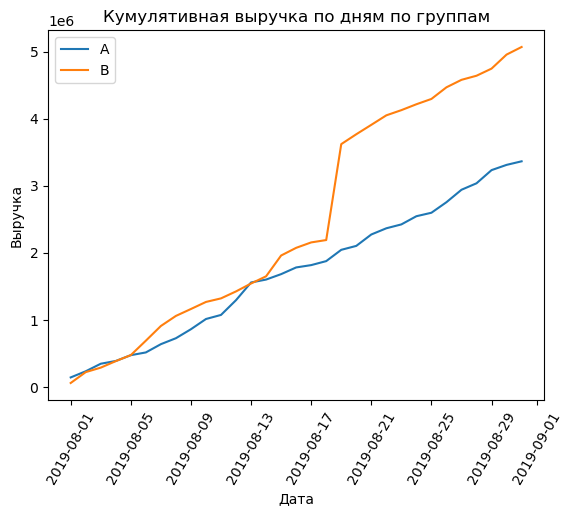

In [31]:
#таблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative[cumulative['group']=='A'][['date','revenue', 'orders']]

#тфблица с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative[cumulative['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивная выручка по дням по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.xticks(rotation=60)
plt.legend() 
plt.show()

Выручка 17 дней равномерно увеличивалась в обеих группах, но потом у В был резкий скачок, что могло быть связано с дорогим заказом или увеличением количества покупателей в эти дни. Но в любом случае во второй половине месяца группа В начала лидировать по выручке.

### 3.2 Построение графика кумулятивного среднего чека по группам. 

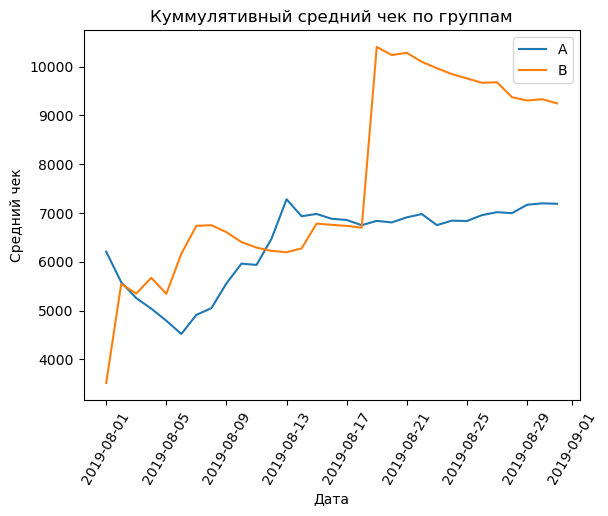

In [32]:
#поостроение графика для изучения кумулятивного среднего чека по группам
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('Куммулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.xticks(rotation=60)
plt.legend() 
plt.show()

с 17 августа средний чек становится равномерным для группы А, но начинает падать у группы В. Для этой группы нужно немного больше времени, чтоб ее средний чек стал более равномерным.

### 3.3 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

In [33]:
#создаем новую таблицу
merged_cumulative_revenue= cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_revenue.head(10)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89
5,2019-08-06,515332,114,690490,112
6,2019-08-07,638580,130,909654,135
7,2019-08-08,727219,144,1059795,157
8,2019-08-09,861456,155,1162961,176
9,2019-08-10,1013731,170,1268123,198


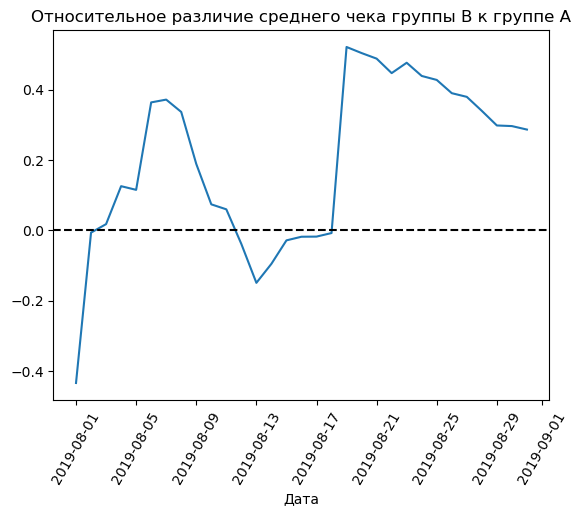

In [34]:
#построение графика с отношением средних чеков
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
#добавление оси х 
plt.title('Относительное различие среднего чека группы В к группе А')
plt.axhline(y=0, color='black',linestyle='--')
plt.xlabel('Дата')
plt.xticks(rotation=60)
plt.show()

График в нескольких точках скачет, что скорее всего свидетельствует о том, что в данных есть выбросы.

### 3.4 Построение графика кумулятивного среднего количества заказов на посетителя по группам

In [35]:
#подсчет куммулятивного среднего количества заказов на посетителя по группам
cumulative['conversion']=cumulative['orders']/cumulative['visitors']
#выбираем данные по группе А
cumulative_a =cumulative[cumulative['group']=='A']
#выбираем данные по группе В
cumulative_b =cumulative[cumulative['group']=='B']

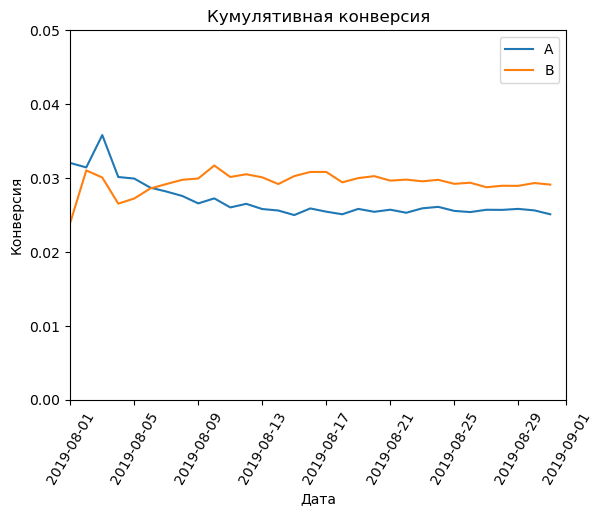

In [36]:
#строим графики
plt.plot(cumulative_a['date'],cumulative_a['conversion'],label='A')
plt.plot(cumulative_b['date'],cumulative_b['conversion'],label='B')
#устанавливаем масштаб осей
plt.title('Кумулятивная конверсия')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019,9, 1), 0, 0.05])
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=60)
plt.legend()
plt.show()

Сначала конверсии шли в одном направлении, а после конверсия группы В вышла вперед и зафиксировалась, а конверсия группы А упала и тоже зафиксировалась.

### 3.5 Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

In [37]:
#созданием новой таблицы
merged_cumulative_conversions=(cumulative_a[['date','conversion']]
                               .merge(cumulative_b[['date','conversion']], left_on='date',
                                      right_on='date',how='left',suffixes=['A','B'])
                              )
merged_cumulative_conversions.head(10)

,date,conversionA,conversionB
0,2019-08-01,0.032033,0.023977
1,2019-08-02,0.031437,0.031032
2,2019-08-03,0.035811,0.030067
3,2019-08-04,0.030137,0.026531
4,2019-08-05,0.029927,0.027234
5,2019-08-06,0.028701,0.028586
6,2019-08-07,0.028175,0.029183
7,2019-08-08,0.027576,0.029763
8,2019-08-09,0.026568,0.029937
9,2019-08-10,0.027248,0.031695


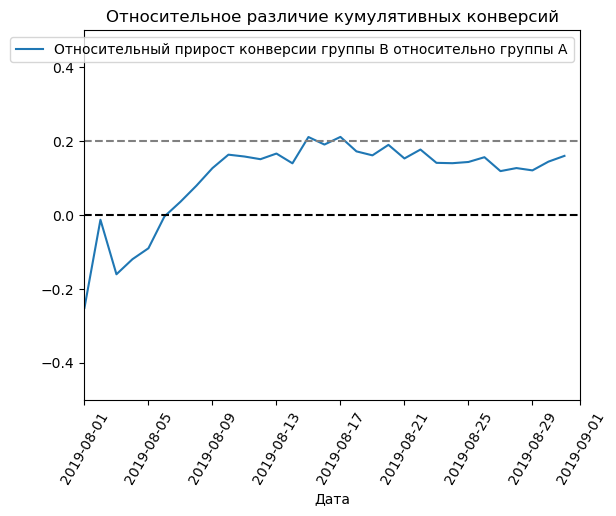

In [38]:
#построение графика
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']
         /merged_cumulative_conversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=.2, color='grey', linestyle='--')
#устанавливаем масштаб осей
plt.title('Относительное различие кумулятивных конверсий')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019,9, 1), -0.5, 0.5])
plt.xlabel('Дата')
plt.xticks(rotation=60)
plt.show()

После 5 августа 2019 года группа В вышла в лидеры по конверсии, относительно группы А. Дальше конверсия продолжила свой рост до 20%, но после идет скачкообразный график, конверсия еще не зафиксировалась.

### 3.6 Построение точечного графика количества заказов по пользователям

In [39]:
#подсчет количества заказов по пользователям и вывод результата
orders_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_users.columns = ['user_id', 'orders']

orders_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Есть пользователи, которые совершали 2,3 заказа. Но нужно понять сколько чаще всего делают заказы пользователи в среднем.

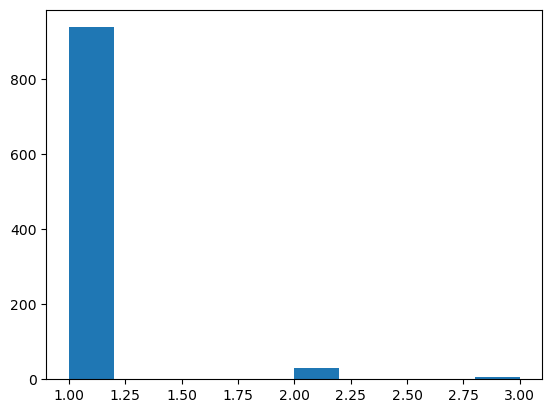

In [40]:
plt.hist(orders_users['orders']) 
plt.show()

Большинство покупателей делают заказ только один раз, но при этом есть значительная доля тех, кто делает 2 заказа.

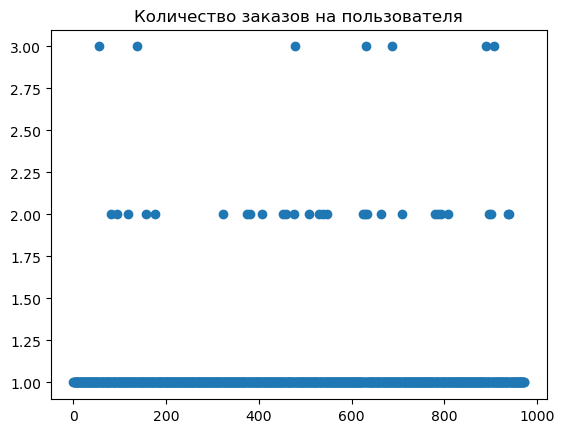

In [41]:
#построение диаграммы рассеяния
x_values = pd.Series(range(0,len(orders_users)))
plt.scatter(x_values, orders_users['orders']) 
plt.title('Количество заказов на пользователя')
plt.show()

По точечному графику мы так же видим, что больше всего пользователи совершают одну покупку, но есть значительная часть тех, кто делает и второй заказ.

### 3.7 Подсчет 95-й и 99-й перцентилей количества заказов на пользователя.

In [42]:
#подсчёт перцентилей
np.percentile(orders_users['orders'], [90, 95, 99])

array([1., 1., 2.])

Из данного анализа можно сделать вывод, что аномалией считаются люди, которые сделали заказ больше 2 раз. 

### 3.8 Построение точечного графика стоимостей заказов. 

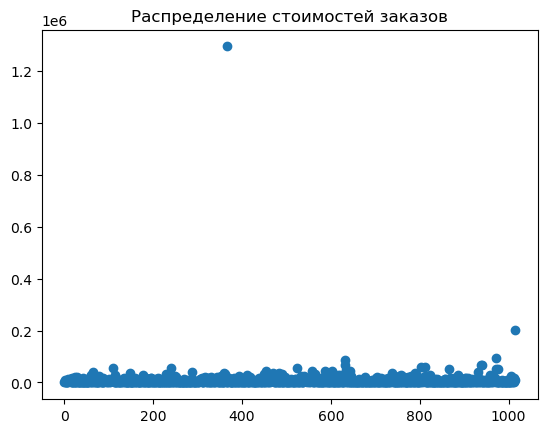

In [43]:
#построение диаграммы рассеяния
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение стоимостей заказов')
plt.show()

По точечному графику мы видим, что люди чаще всего совершают заказ на сумму до 100 000 рублей. По этим данным мы выявили границу аномальных заказов между 100 000 и 1 300 000 рублями. 

### 3.9 Подсчет 95-й и 99-й перцентилей стоимости заказов.

In [44]:
#подсчёт перцентилей
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Данный рассчет показывает, что не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей.

Проведя анализ выбросов, мы определили аномальные данные.
Аномальные данные: сумма заказа больше 54 000 и количество заказов больше 2.

### 3.10 Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для начала нам нужно сформулировать две гипотезы , чтоб посчитать статистическую значимость различий в среднем числе заказов на посетителя между группами по "сырым" данным.

Нулевая гипотеза- различий в среднем количестве заказов на посетителя между группами нет.
Альтернативная гипотеза- различия в среднем количестве заказов на посетителя между группами есть.

#### 3.10.1 Теперь подготовим данные для анализа, для этого создадим новые переменные 

In [45]:
#создание новой таблицы
visitors_a_daily=visitors[visitors['group']=='A'][['date','visitors']]
#переименование столбцов
visitors_a_daily.columns=['date','visitors_per_a']
visitors_a_daily.head(10)

,date,visitors_per_a
0,2019-08-01,718.0
1,2019-08-02,618.0
2,2019-08-03,507.0
3,2019-08-04,712.0
4,2019-08-05,753.0
5,2019-08-06,664.0
6,2019-08-07,642.0
7,2019-08-08,608.0
8,2019-08-09,612.0
9,2019-08-10,405.0


In [46]:
#создание новой таблицы
visitors_cumulative_a=visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date']<=x['date']]
                                      .agg({'date':'max','visitors_per_a':'sum'}),axis=1)
#переименование столбцов
visitors_cumulative_a.columns=['date','visitors_cumulative_a']
visitors_cumulative_a.head(10)

,date,visitors_cumulative_a
0,2019-08-01,718.0
1,2019-08-02,1336.0
2,2019-08-03,1843.0
3,2019-08-04,2555.0
4,2019-08-05,3308.0
5,2019-08-06,3972.0
6,2019-08-07,4614.0
7,2019-08-08,5222.0
8,2019-08-09,5834.0
9,2019-08-10,6239.0


In [47]:
#создание новой таблицы
visitors_b_daily=visitors[visitors['group']=='B'][['date','visitors']]
#переименование столбцов
visitors_b_daily.columns=['date','visitors_per_b']
visitors_b_daily.head(10)

,date,visitors_per_b
31,2019-08-01,709.0
32,2019-08-02,580.0
33,2019-08-03,507.0
34,2019-08-04,767.0
35,2019-08-05,705.0
36,2019-08-06,650.0
37,2019-08-07,708.0
38,2019-08-08,649.0
39,2019-08-09,604.0
40,2019-08-10,368.0


In [48]:
#создание новой таблицы
visitors_cumulative_b=visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date']<=x['date']]
                                      .agg({'date':'max','visitors_per_b':'sum'}),axis=1)
#переименование столбцов
visitors_cumulative_b.columns=['date','visitors_cumulative_b']
visitors_cumulative_b.head(10)

,date,visitors_cumulative_b
31,2019-08-01,709.0
32,2019-08-02,1289.0
33,2019-08-03,1796.0
34,2019-08-04,2563.0
35,2019-08-05,3268.0
36,2019-08-06,3918.0
37,2019-08-07,4626.0
38,2019-08-08,5275.0
39,2019-08-09,5879.0
40,2019-08-10,6247.0


In [49]:
#создание новой таблицы
orders_a_daily=(orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)
#переименование столбцов
orders_a_daily.columns=['date','orders_per_a','revenue_per_a']
orders_a_daily.head(10)

,date,orders_per_a,revenue_per_a
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383
5,2019-08-06,15,40919
6,2019-08-07,16,123248
7,2019-08-08,14,88639
8,2019-08-09,11,134237
9,2019-08-10,15,152275


In [50]:
#создание новой таблицы
orders_cumulative_a=orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_a': 'sum', 'revenue_per_a': 'sum'}),axis=1,
).sort_values(by=['date'])
#переименование столбцов
orders_cumulative_a.columns=['date','orders_cumulative_a','revenue_cumulative_a']
orders_cumulative_a.head(10)

,date,orders_cumulative_a,revenue_cumulative_a
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413
5,2019-08-06,114,515332
6,2019-08-07,130,638580
7,2019-08-08,144,727219
8,2019-08-09,155,861456
9,2019-08-10,170,1013731


In [51]:
#создание новой таблицы
orders_b_daily=(orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
)
#переименование столбцов
orders_b_daily.columns=['date','orders_per_b','revenue_per_b']
orders_b_daily.head(10)

,date,orders_per_b,revenue_per_b
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908
5,2019-08-06,23,214842
6,2019-08-07,23,219164
7,2019-08-08,22,150141
8,2019-08-09,19,103166
9,2019-08-10,22,105162


In [52]:
#создание новой таблицы
orders_cumulative_b=orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_b': 'sum', 'revenue_per_b': 'sum'}),axis=1,
).sort_values(by=['date'])
#переименование столбцов
orders_cumulative_b.columns=['date','orders_cumulative_b','revenue_cumulative_b']
orders_cumulative_b.head(10)

,date,orders_cumulative_b,revenue_cumulative_b
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648
5,2019-08-06,112,690490
6,2019-08-07,135,909654
7,2019-08-08,157,1059795
8,2019-08-09,176,1162961
9,2019-08-10,198,1268123


In [53]:
#создание новой таблицы
df=(
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cumulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cumulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_cumulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cumulative_b, left_on='date', right_on='date', how='left')
)
df.head(10)

,date,orders_per_a,revenue_per_a,orders_per_b,revenue_per_b,orders_cumulative_a,revenue_cumulative_a,orders_cumulative_b,revenue_cumulative_b,visitors_per_a,visitors_per_b,visitors_cumulative_a,visitors_cumulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,718.0,709.0,718.0,709.0
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,618.0,580.0,1336.0,1289.0
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507.0,507.0,1843.0,1796.0
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,712.0,767.0,2555.0,2563.0
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,753.0,705.0,3308.0,3268.0
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,664.0,650.0,3972.0,3918.0
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,642.0,708.0,4614.0,4626.0
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,608.0,649.0,5222.0,5275.0
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,612.0,604.0,5834.0,5879.0
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,405.0,368.0,6239.0,6247.0


#### 3.10.2 Посчитаем  статистическую значимость различий среднего кол-ва заказов между группами

In [54]:
#создание новой таблицы
orders_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименование столбцов
orders_users_a.columns = ['user_id', 'orders']
orders_users_a.head(10)

,user_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
5,87885904,1
6,109615108,1
7,130417038,1
8,132143192,1
9,138252163,1


In [55]:
#создание новой таблицы
orders_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
#переименование столбцов
orders_users_b.columns = ['user_id', 'orders']
orders_users_b.head(10)

,user_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
5,56960363,1
6,71018815,1
7,78678012,1
8,91069833,1
9,102981183,1


In [56]:
sample_a = pd.concat([orders_users_a['orders'],pd.Series(0,index=np.arange(
                df['visitors_per_a'].sum() - len(orders_users_a['orders'])),name='orders',
        )],axis=0,
)

In [57]:
sample_b = pd.concat([orders_users_b['orders'],pd.Series(0,index=np.arange(
                df['visitors_per_b'].sum() - len(orders_users_b['orders'])),name='orders',
        )],axis=0,
)

In [58]:
print('p_value:',"{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p_value: 0.011
0.160


P_value меньше 0,05. Значит нулевую гипотезу можно отвергнуть. Однако относительный прирост среднего группы В к конверсии группы А равен 16%.
Получается различия в среднем количестве заказов на посетителя между группами есть.

### 3.11 Подсчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Для проверки статистической значимости различий в среднем чеке заказа между группами определим гипотезы. Нулевая гипотеза- различий в среднем чеке между группами нет. Альтернативная гипотеза -различия в среднем чеке между группами есть.

In [59]:
print('p_value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)) 

p_value: 0.829
0.287


P-value больше 0,05. Значит нулевую гипотезу не отвергаем. Так же данные показывают, относительное различие среднего чека между группами 28%, но они не являются статистически значимыми.

### 3.12 Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Теперь уберем из данных аномалии, чтоб провести дальнейший анализ.

In [60]:
#определение пользователей с аномальным количеством заказов
users_many_orders=pd.concat([
    orders_users_a[orders_users_a['orders']>2]['user_id'],
    orders_users_b[orders_users_b['orders']>2]['user_id']],axis=0)
#определение пользователей с аномальной стоимостью заказа
users_expensive=orders[orders['revenue']>54000]['visitor_id']

In [61]:
#подсчет аномалького количества пользователей
anomal_users=(pd.concat([users_many_orders,users_expensive],axis=0)
              .drop_duplicates()
              .sort_values()
             )
anomal_users.shape[0]

16

Всего у нас 16 аномальных пользователей.

In [62]:
#сохранение новой выборки по группе А
sample_a_filter=pd.concat(
    [orders_users_a[np.logical_not(orders_users_a['user_id'].isin(anomal_users))]['orders'],
     pd.Series(0,index=np.arange(df['visitors_per_a'].sum()-len(orders_users_a['orders'])),
              name='orders')], axis=0)
#сохранение новой выборки по группе В
sample_b_filter=pd.concat(
    [orders_users_b[np.logical_not(orders_users_b['user_id'].isin(anomal_users))]['orders'],
     pd.Series(0,index=np.arange(df['visitors_per_b'].sum()-len(orders_users_b['orders'])),
              name='orders')], axis=0)

In [63]:
print('p_value:','{0:.3f}'.format(stats.mannwhitneyu(sample_a_filter, sample_b_filter)[1]))
print('{0:.3f}'.format(sample_b_filter.mean()/sample_a_filter.mean()-1)) 

p_value: 0.007
0.189


Результаты по среднему количеству заказов почти не изменились. Все так же значит, что различия в среднем количестве заказов на посетителя между группами есть, значит отвергаем нулевую гипотезу. А так же видно, что группа В значительно лучше группы А.

### 3.13 Подсчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [64]:
print('p_value:','{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and( orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(anomal_users)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(anomal_users)),)
            ]['revenue'],)[1]))

print('{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(anomal_users)),)]['revenue'].mean()
        / orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(anomal_users)),)]['revenue'].mean()- 1)) 

p_value: 0.788
-0.032


По среднему чеку данные немного изменились. Гипотезу нулевую мы так же не отвергаем, тк значение p_value больше 0,05. Но теперь в очищенных данных средний чек группы В ниже среднего чека группы А, но это не статистически значимо.

По анализу сырых и очищенных данных можно сказать, что:
- в данных есть статистически значимое различие по среднему количеству заказов на посетителя между группами, даже после фильтрации данных;
- в данных отсутствует различие в среднем чеке между группами и то же самое по отфильтрованным данным.

## 4 Вывод

В данной работе мы подготовили данные для анализа, сделали приоритизацию гипотезы и проанализировали результаты А/В-теста.

В первой части мы ознакомились с тремя таблицами, изменили тип данных в столбцах с датой на datetime. А так же привели названия столбцов к змеиному регистру.

Во второй части мы сделали приоритизацию гипотезы с помощью фреймворка ICE, который показал, что в первую очередь нужно начать тестировать гипотезы 8, 0, 7 и 6.
- 8-'Запустить акцию, дающую скидку на товар в день рождения'
- 0-'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 7-'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
- 6-'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'

А фрейморк RICE показал, что в сначала надо проверить гипотезы 7, 2, 0, 6.
- 7-'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'
- 2-'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
- 0-'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 6-'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'

Сравнив два результата, можно сказать, что сначала стоит проверить гипотезы 0, 7 и 6, так как они по приоритизации попадают оба в топ в двух фреймворках:
- 7-'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- 0-'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 6-'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'

В третьей части мы проанализировали А/В-тест. Мы выявили, что некоторые пользователи были не правильно разбиты по группам( попали в обе группы), так как таких пользователей было всего 5%, то мы их убрали. Так же мы отредактировали таблицу visitors на основе данных о неправильных пользователей, попавших в две группы.

При изучении кумулятивной выручки и кумулятивного среднего чека по группам было выявлено, что группа В лидирует по выручке и по среднему чеку, нежели группа А, но это могло быть связано с выбросами в данных.

Далее мы построили три графика. Один из них показал, что относительное изменения кумулятивного среднего чека группы B к группе A скачет, что может быть связано с выбросами. А по графику кумулятивного среднего количества заказов на посетителя по группам было видно, что конверсия группы В выше группы А и зафиксирована. Но в следующем графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A конверсия так же выше у группы В, но она все еще скачкообразно и нужно больше времени, чтоб она зафиксировалась.

Так же мы провели анализ выбросов и выявили, что аномальными данными являются:
- пользователи, которые совершили заказ на сумму более 54 000 рублей;
- пользователи, которые совершали покупку больше 2 раз за месяц.

По дальнейшему анализу мы выявили факты:
- Есть статистически значимое различие по среднему количеству заказов на посетителя между группами, даже после фильтрации данных.
- Отсутствие различий в среднем чеке между группами и то же самое по отфильтрованным данным. 
- Средний чек выше в группе B, но после фильтрации ситуация изменилась и средний чек группы В стал ниже.
- График различия конверсии между группами показывает, что результаты группы B лучше группы A.
- График различия среднего чека колеблется, что позволило найти аномалии. Показатели по этому графику еще не зафиксировались.

Из всего анализа А/В- теста можно принять решение об остановке теста. Группа В побеждает в нем, так как есть статистически значимое различие по среднему количеству заказов на посетителя между группами и конверсия показала, что лучше у группы В.  